# File and libraries

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath = r'dataset/df_ecom_data_prep_encoded_v2.csv'


file_tag = "df_ecom_encoded"

# DSLabs functions

In [80]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

%run "data_functions.py" #run notebook with additional functions made by the group and needed for the project


dslabs_functions lodaded
data_functions loaded


# Load

In [87]:
# test_data=True
test_data=False

if test_data==True:

    df=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)
    

else:
    df=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='conversion'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197632 entries, 86742 to 109086
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  177829 non-null  float64
 1   category_code_lvl_2  177828 non-null  float64
 2   category_code_lvl_3  177829 non-null  float64
 3   price                197632 non-null  float64
 4   conversion           197632 non-null  int64  
 5   week_of_month        197632 non-null  int64  
 6   is_weekend           197632 non-null  int64  
 7   day                  197632 non-null  int64  
 8   time_of_day_sin      197632 non-null  float64
 9   time_of_day_cos      197632 non-null  float64
 10  day_of_week_sin      197632 non-null  float64
 11  day_of_week_cos      197632 non-null  float64
 12  hour_sin             197632 non-null  float64
 13  hour_cos             197632 non-null  float64
 14  min_sin              197632 non-null  float64
 15  min_cos           

In [88]:
df.head()

,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
86742,7.0,45.0,105.0,128.45,0,0,0,0,0.0,1.0,1.0,0.0,0.817,-0.577,-0.000,1.000
196614,0.0,0.0,2.0,360.34,0,0,0,0,0.0,-1.0,1.0,0.0,-0.817,-0.577,-0.991,-0.133
88560,NaN,NaN,NaN,437.57,0,0,0,0,0.0,1.0,1.0,0.0,0.817,-0.577,-0.818,0.575
22469,12.0,60.0,128.0,1338.13,0,0,0,0,-0.0,1.0,1.0,0.0,-0.888,0.460,-1.000,-0.027
65266,3.0,20.0,62.0,0.79,0,0,0,0,-0.0,1.0,1.0,0.0,0.979,0.203,-0.921,0.389


In [34]:
distinct_values = df.loc[df['is_purchase'] == 1, 'category_code_lvl_1'].unique()
print(distinct_values)



[11.  7.  5.  3.  2.  0. nan  1.  6.  8. 12.  4.  9. 10.]


In [7]:
num_records_per_category = df.loc[df['is_purchase'] == 1].groupby('category_code_lvl_1').size()
print(num_records_per_category)

category_code_lvl_1
0.0      702
1.0      192
2.0     1482
3.0      356
4.0       37
5.0      633
6.0      160
7.0      389
8.0       40
9.0        2
10.0       2
11.0    3202
12.0      59
dtype: int64


In [8]:
distinct_values = df.loc[df['is_purchase'] == 1, 'category_code_lvl_2'].unique()
print(distinct_values)

[16. 57.  0. 42. 20. 50. 15. 41. 17. 58. 24. 59. 38. 52.  9. 46. nan 36.
 18. 19.  6.  2. 55. 27.  1. 48. 45. 21. 32.  4. 54. 10. 14. 11. 53. 39.
 22.  7. 34. 40.  8.  5. 13. 37. 60. 44. 35. 49. 33. 26. 61. 43. 25. 23.
 47. 56.]


In [12]:
distinct_values = df.loc[df['is_purchase'] == 1, 'category_code_lvl_3'].unique()
print(distinct_values)

[ 54. 125.   2. 102.  61. 104.  53. 128.  87.   3.  55.  34.  47. 121.
  70. 132.  90. 106.  52.  20. 100.  nan  15.  85.  68.  30.  51.  63.
  10.   6. 119.  96.  37.  76.  93.   7.  95.   8. 109.  99.  58.  82.
  44.  41.  12.   9. 112.  39.  38.  28.   0. 116. 124.  64.  48.  57.
  24. 126. 107.  80.   5. 131.  69.  60.  22.  91.  19.   4.  94.  45.
  65.  92.  43.  83.  79.  31. 110. 123.  27.  23.  42.  13.  67.  36.
  97.  86. 133.  98.  46.  89. 105.  81.  75.  40. 134. 127.  32.  66.
 101.  74.  56.  71.  62. 111. 129.  59.  29. 103. 120.]


In [13]:
distinct_values = df.loc[df['is_purchase'] == 1, 'day_of_week_sin'].unique()
print(distinct_values)

[0.866 0.    1.    0.5  ]


# Missing Values Analysis

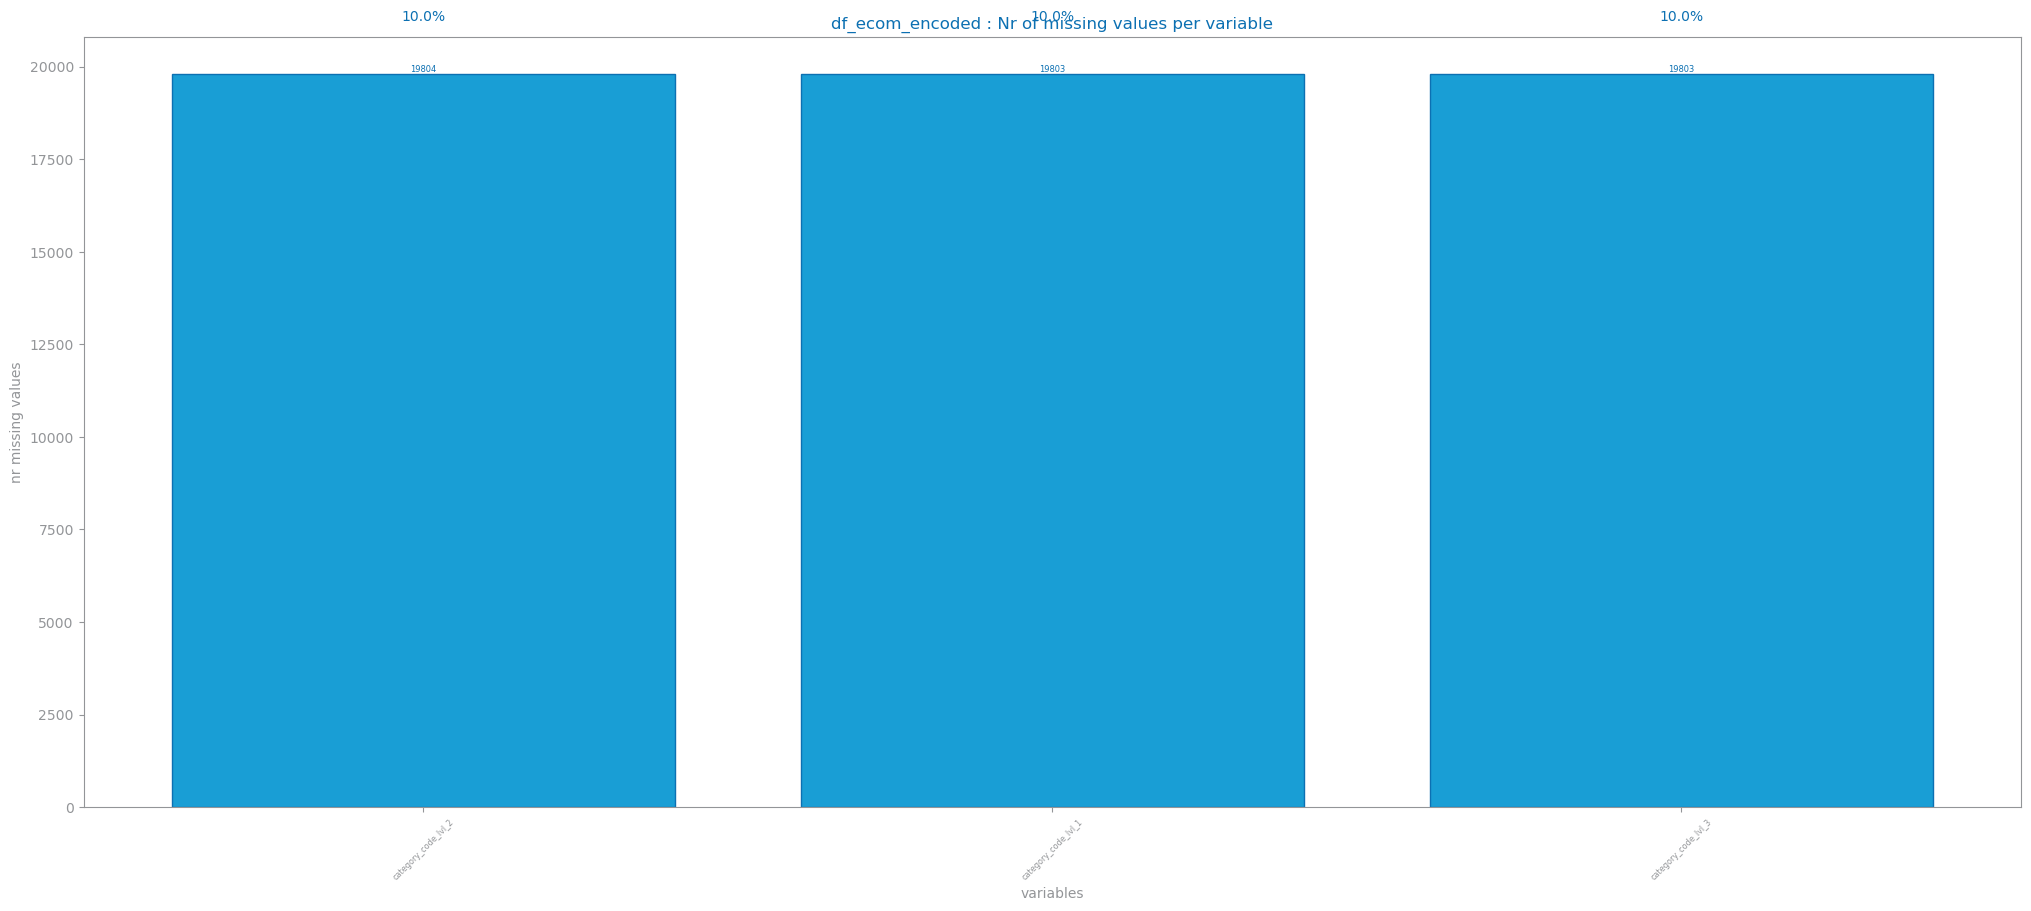

In [89]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy aplication

In [90]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=df.copy()
    df_copy = mvi_by_filling(df_copy, strategy="frequent")

    return df_copy

df_1=apply_strategy_1(df)
df_1.describe()

,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,conversion,is_weekend,time_of_day_cos
count,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.0,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000
mean,5.686283,33.334244,77.585911,271.550282,1.900639,16.103612,0.0,0.561417,0.242129,0.003430,-0.262836,-0.003557,0.016947,0.039685,0.266389,0.198166
std,4.298049,20.745075,40.964041,353.770417,1.213250,8.359449,0.0,0.381172,0.693449,0.750548,0.606384,0.701852,0.712112,0.195218,0.442071,0.980171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.866000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000,0.000000,-1.000000
25%,2.000000,15.000000,51.000000,51.460000,1.000000,10.000000,0.0,-0.000000,-0.500000,-0.817000,-0.776000,-0.716000,-0.698000,0.000000,0.000000,-1.000000
50%,5.000000,33.334244,77.585911,148.780000,2.000000,17.000000,0.0,0.500000,0.500000,0.000000,-0.335000,0.000000,0.080000,0.000000,0.000000,1.000000
75%,12.000000,60.000000,126.000000,339.520000,3.000000,23.000000,0.0,0.866000,1.000000,0.817000,0.203000,0.678000,0.735000,0.000000,1.000000,1.000000
max,12.000000,61.000000,134.000000,2574.070000,4.000000,29.000000,0.0,1.000000,1.000000,0.998000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
print("Colunas do DataFrame de df_1:", df_1.columns)

Colunas do DataFrame de df_1: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'conversion', 'is_weekend', 'time_of_day_cos'],
      dtype='object')


## MV1 target class

In [38]:

print("Colunas do DataFrame de df_1:", df_1.columns)

Colunas do DataFrame de df_1: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos'],
      dtype='object')


In [93]:

def define_target_and_prepare_data(df: pd.DataFrame, target: str) -> Tuple[np.ndarray, pd.Series, List[int], Dict[str, List[int]]]:
    """
    Defines the target variable and prepares the feature set and target labels.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target (str): The name of the target variable.

    Returns:
    Tuple[np.ndarray, pd.Series, List[int], Dict[str, List[int]]]: A tuple containing:
        - y (pd.Series): The target variable.
        - X (np.ndarray): The feature set.
        - labels (List[int]): Sorted list of unique labels.
        - values (Dict[str, List[int]]): Counts of original classes.
    
    Raises:
    KeyError: If the target variable is not found in the DataFrame.
    """
    
    # Check if the target exists in the DataFrame
    if target not in df.columns:
        raise KeyError(f"The target column '{target}' does not exist in the DataFrame. Available columns are: {df.columns.tolist()}")

    # Extract labels and sort them
    labels: list = list(df[target].unique())
    labels.sort()
    print(f"Labels={labels}")

    # Create a dictionary to store original class counts
    values: dict[str, list[int]] = {
        "Original": [
            len(df[df[target] == 0]),  # Assuming 0 is the negative class
            len(df[df[target] == 1]),  # Assuming 1 is the positive class
        ]
    }

    y: pd.Series = df.pop(target)  # Keep y as a Series
    X: np.ndarray = df.values  # Extract the features as ndarray

    return y, X, labels, values


def split_data_save_csv(X: pd.DataFrame, y: pd.Series, data_columns: List[str], target_column: str, file_tag=None, train_size=0.7, save=False, save_path="data/"):
    """
    Splits data into training and test sets, then returns the corresponding DataFrames.
    Optionally saves the DataFrames as CSV files.
    
    Parameters:
    X (pd.DataFrame): The feature set.
    y (pd.Series): The target labels.
    data_columns (list): The column names of X.
    target_column (str): The name of the target column.
    file_tag (str, optional): Tag to use in the filename if saving CSVs.
    train_size (float, optional): Proportion of data to use for training (default is 0.7).
    save (bool, optional): Whether to save the train/test DataFrames as CSV files (default is False).
    save_path (str, optional): Path to save the CSV files (default is "data/").    
    Returns:
    train (pd.DataFrame): The training DataFrame (features + target).
    test (pd.DataFrame): The testing DataFrame (features + target).
    """
    # Calculate the split index based on train_size
    split_index = int(len(X) * train_size)

    # Split the DataFrame into train and test sets
    train_X = X.iloc[:split_index]
    test_X = X.iloc[split_index:]

    # Separate the target variable
    train_y = y.iloc[:split_index]
    test_y = y.iloc[split_index:]

    # Create train and test DataFrames including the target
    train = pd.concat([train_X.reset_index(drop=True), train_y.reset_index(drop=True)], axis=1)
    test = pd.concat([test_X.reset_index(drop=True), test_y.reset_index(drop=True)], axis=1)

    # Optionally save to CSV
    if save and file_tag:
        train.to_csv(f"{save_path}{file_tag}_train.csv", index=False)
        test.to_csv(f"{save_path}{file_tag}_test.csv", index=False)

    return train, test

## MV1 train/test split 

Labels=[0.0, 1.0]


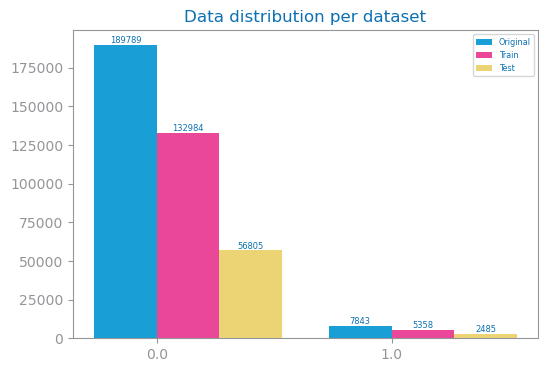

In [94]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

from numpy import array, ndarray

y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [59]:
print("Colunas do DataFrame de treino:", train_1.columns)
print("Colunas do DataFrame de teste:", test_1.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'time_of_day_cos', 'conversion'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'time_of_day_cos', 'conversion'],
      dtype='object')


In [14]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_1['day'].min()
max_day_train = train_1['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_1['day'].min()
max_day_test = test_1['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")


Train set - Min day: 0.0, Max day: 22.0
Test set - Min day: 22.0, Max day: 29.0


In [25]:
print("Colunas do DataFrame de treino:", train_1.columns)
print("Colunas do DataFrame de teste:", test_1.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')


## MV1 evaluate

In [14]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')


In [ ]:
def run_NB(trnX, trnY, tstX, tstY, metric: str = "accuracy") -> dict[str, float]:
    estimators: dict[str, GaussianNB | BernoulliNB] = {
        "GaussianNB": GaussianNB(),
        #we are not goin to use this one, because we have negative values in cyclical variables. And this method can't work with negative values
        
        #"MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
    }
    best_model: GaussianNB | BernoulliNB = None  # type: ignore
    best_performance: float = 0.0
    eval: dict[str, float] = {}

    for clf in estimators:
        estimators[clf].fit(trnX, trnY)
        prdY: ndarray = estimators[clf].predict(tstX)
        performance: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
        if performance - best_performance > DELTA_IMPROVE:
            best_performance = performance
            best_model = estimators[clf]
    if best_model is not None:
        prd: ndarray = best_model.predict(tstX)
        for key in CLASS_EVAL_METRICS:
            eval[key] = CLASS_EVAL_METRICS[key](tstY, prd)
    return eval

In [95]:
def run_NB(trnX, trnY, tstX, tstY, metric: str = "accuracy") -> dict[str, float]:
    estimators: dict[str, GaussianNB | BernoulliNB] = {
        "GaussianNB": GaussianNB(),
        "BernoulliNB": BernoulliNB(),
    }
    best_model: GaussianNB | BernoulliNB = None  # type: ignore
    best_performance: float = 0.0
    eval: dict[str, float] = {}

    # Treinar e avaliar cada modelo
    for clf in estimators:
        estimators[clf].fit(trnX, trnY)
        prdY: ndarray = estimators[clf].predict(tstX)
        performance: float = CLASS_EVAL_METRICS[metric](tstY, prdY)

        # Verificar se o modelo atual tem a melhor performance
        if performance - best_performance > DELTA_IMPROVE or best_model is None:
            best_performance = performance
            best_model = estimators[clf]

    # Verificar se há um best_model válido
    if best_model is not None:
        prd: ndarray = best_model.predict(tstX)
        for key in CLASS_EVAL_METRICS:
            eval[key] = CLASS_EVAL_METRICS[key](tstY, prd)
    else:
        print("Nenhum modelo Naive Bayes adequado foi encontrado.")

    return eval

In [96]:


from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "conversion", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval

In [97]:
def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "conversion", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    print("Naive Bayes Evaluation Results:", eval_NB)
    
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    print("KNN Evaluation Results:", eval_KNN)
    
    # Check if both evaluations returned results
    if not eval_NB or not eval_KNN:
        print("One of the evaluation methods returned empty results.")
        return {}

    for met in CLASS_EVAL_METRICS:
        eval[met] = [eval_NB[met], eval_KNN[met]]

    return eval

In [68]:
print(train_1['conversion'].value_counts())
print(test_1['conversion'].value_counts())

KeyError: 'conversion'

In [48]:
train_1.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'time_of_day_cos', 'conversion'],
      dtype='object')

In [49]:
test_1.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'time_of_day_cos', 'conversion'],
      dtype='object')

Naive Bayes Evaluation Results: {'accuracy': 0.9580873671782763, 'recall': 0.0, 'precision': 0.0, 'auc': 0.5, 'f1': 0.0}
KNN Evaluation Results: {'accuracy': 0.9578512396694215, 'recall': 0.0008048289738430583, 'precision': 0.1111111111111111, 'auc': 0.5002615818137415, 'f1': 0.0015980823012385138}


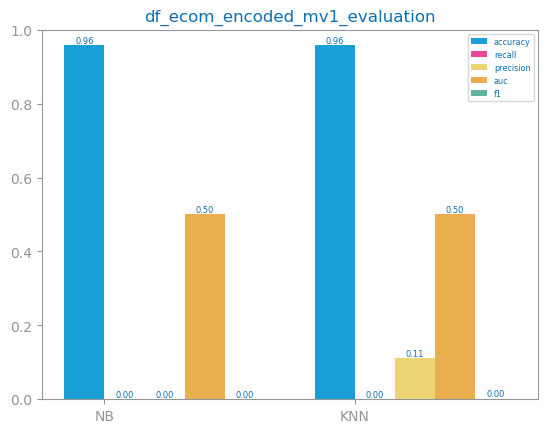

In [98]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='conversion', metric="accuracy")
plot_multibar_chart(
    ["NB", "KNN"], eval_1, title=f"{file_tag}_mv1_evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv1_evaluation.png")
show()


KeyError: 'conversion'

In [34]:
if not eval:  # Se eval estiver vazio
    print("Evaluation results are empty.")
    return {}


SyntaxError: 'return' outside function (2487143775.py, line 3)

# MV2 - drop null strategy

2. Remove remaining null values records

## MV2 strategy aplication

In [19]:
print("Dimensões antes da remoção:", df_1.shape)
df_1.head()


Dimensões antes da remoção: (197632, 16)


,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,is_weekend,time_of_day_cos
0,0.0,7.000000,45.000000,105.000000,128.45,0.0,0.0,0.0,1.0,0.0,0.817,-0.577,-0.000,1.000,0.0,1.0
1,0.0,0.000000,0.000000,2.000000,360.34,0.0,0.0,0.0,1.0,0.0,-0.817,-0.577,-0.991,-0.133,0.0,-1.0
2,1.0,5.686283,33.334244,77.585911,437.57,0.0,0.0,0.0,1.0,0.0,0.817,-0.577,-0.818,0.575,0.0,1.0
3,0.0,12.000000,60.000000,128.000000,1338.13,0.0,0.0,-0.0,1.0,0.0,-0.888,0.460,-1.000,-0.027,0.0,1.0
4,0.0,3.000000,20.000000,62.000000,0.79,0.0,0.0,-0.0,1.0,0.0,0.979,0.203,-0.921,0.389,0.0,1.0


In [20]:
# drop all rows with null values

def apply_strategy_2(df):

    df_copy=df.copy()

    df_copy = df_copy.dropna(axis=0, how="any")

    return df_copy

df_2=apply_strategy_2(df)



In [21]:
print("Dimensões após a remoção:", df_2.shape)
df_2.head()

Dimensões após a remoção: (177828, 17)


,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
86742,0,7.0,45.0,105.0,128.45,0,0,0,0,0.0,1.0,1.0,0.0,0.817,-0.577,-0.000,1.000
196614,0,0.0,0.0,2.0,360.34,0,0,0,0,0.0,-1.0,1.0,0.0,-0.817,-0.577,-0.991,-0.133
22469,0,12.0,60.0,128.0,1338.13,0,0,0,0,-0.0,1.0,1.0,0.0,-0.888,0.460,-1.000,-0.027
65266,0,3.0,20.0,62.0,0.79,0,0,0,0,-0.0,1.0,1.0,0.0,0.979,0.203,-0.921,0.389
111177,0,5.0,27.0,76.0,7.39,0,0,0,0,0.0,1.0,1.0,0.0,0.998,-0.068,0.848,-0.530


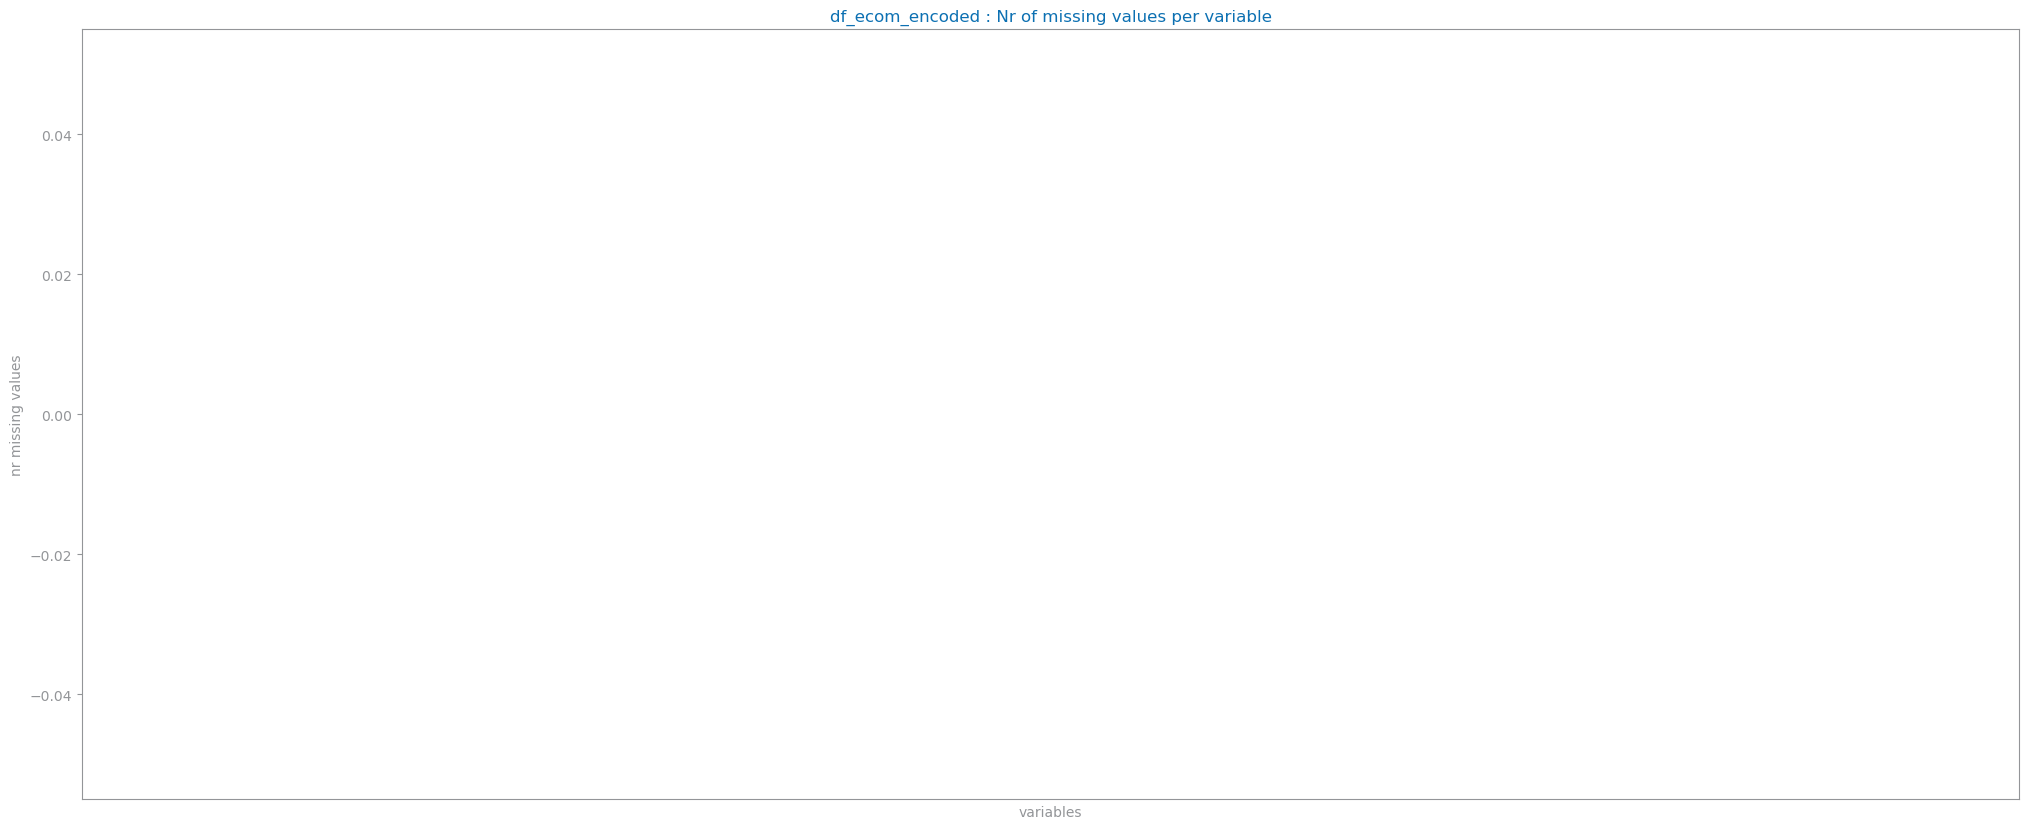

In [22]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df_1.columns:
    nr: int = df_1[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

## MV2 target class

In [23]:
y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

Labels=[0, 1]


## MV2 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

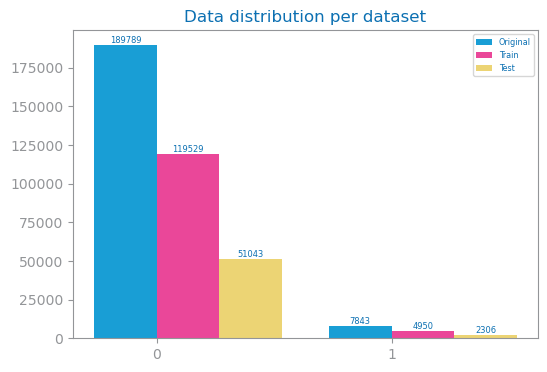

In [24]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

In [25]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_2['day'].min()
max_day_train = train_2['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_2['day'].min()
max_day_test = test_2['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")

Train set - Min day: 0.0, Max day: 22.0
Test set - Min day: 22.0, Max day: 29.0


## MV2 evaluate

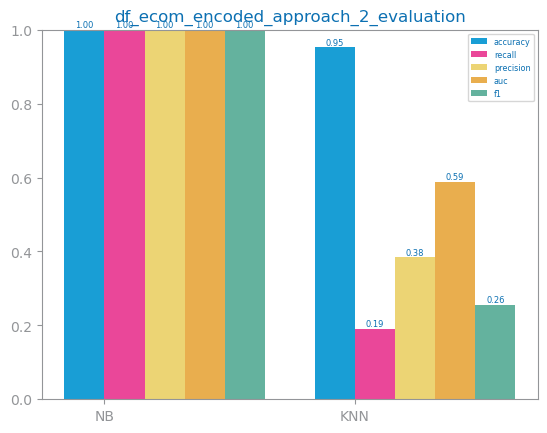

In [26]:

figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='conversion', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
)
savefig(f"images/{file_tag}_approach_2_evaluation.png")
show()

## uplift df

In [27]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

# Calculate uplift
df_uplift = df_eval_2 - df_eval_1



# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



# Display the DataFrame
comparison_df

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
KNN           0.954782  0.208853  0.420583  0.598133  0.279107   0.951827   

                                                      Uplift            \
              recall precision       auc        f1  accuracy    recall   
Naive Bayes  1.00000  1.000000  1.000000  1.000000  0.000000  0.000000   
KNN          0.19124  0.384817  0.588714  0.255504 -0.002955 -0.017613   

                                           
            precision       auc        f1  
Naive Bayes  0.000000  0.000000  0.000000  
KNN         -0.035767 -0.009419 -0.023603

## t test

In [28]:

from scipy.stats import ttest_rel


# Perform paired t-tests for each metric
t_test_results = {'t_stat': [], 'p_value': []}
for metric in eval_1.keys():
    t_stat, p_value = ttest_rel(df_eval_1[metric], df_eval_2[metric])
    t_test_results['t_stat'].append(t_stat)
    t_test_results['p_value'].append(p_value)

# Create DataFrame for t-test results
df_ttest = pd.DataFrame(t_test_results, index=eval_1.keys())

# Convert t-test results to a DataFrame with MultiIndex and concatenate it
df_ttest_multi = pd.DataFrame({
    ('t_test', 't_stat'): df_ttest['t_stat'],
    ('t_test', 'p_value'): df_ttest['p_value']
})

df_ttest_multi

t_test        
          t_stat p_value
accuracy     1.0     0.5
recall       1.0     0.5
precision    1.0     0.5
auc          1.0     0.5
f1           1.0     0.5

# Analysis

- we will move forward with approach 1 because it has better precision and recall
- Datset choosen:
    - Df_1 : Approach - Replace missing values with most frequent values

# save to csv

In [29]:
if test_data==False:
    
    df=apply_strategy_1(df)
    
    df.to_csv(f"dataset/df_ecom_2_2_mv_input_v2.csv", index=False)
    